In [1]:
import numpy as np # type: ignore
import pandas as pd # type: ignore
import matplotlib.pyplot as plt # type: ignore
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler,Binarizer,Normalizer,OneHotEncoder,LabelEncoder # type: ignore

In [2]:
np.random.seed(5)
a = np.random.normal(0, 2, 10000)
b = np.random.normal(5, 3, 10000)
c = np.random.normal(-5, 5, 10000)

df = pd.DataFrame({
    'A' : a,
    'B' : b,
    'C' : c
})
df

,A,B,C
0,0.882455,1.466990,-7.089363
1,-0.661740,0.571914,-3.105893
2,4.861542,7.828852,-1.039068
3,-0.504184,5.001904,-9.755722
4,0.219220,1.731128,-7.679528
...,...,...,...
9995,-0.068972,3.739968,-4.303864
9996,-2.167260,0.681434,-9.584910
9997,2.188712,9.860986,-9.986860
9998,0.595445,5.982577,-11.128039


<Axes: ylabel='Density'>

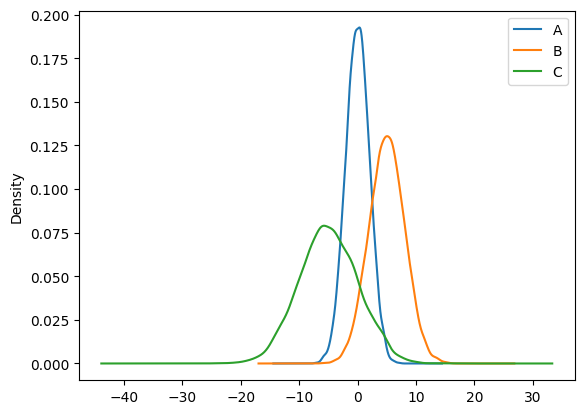

In [3]:
df.plot.kde()

In [4]:
scaler = StandardScaler()

In [5]:
scaled = scaler.fit_transform(df)

In [6]:
df = pd.DataFrame(scaled, columns=['A','B','C'])

<Axes: ylabel='Density'>

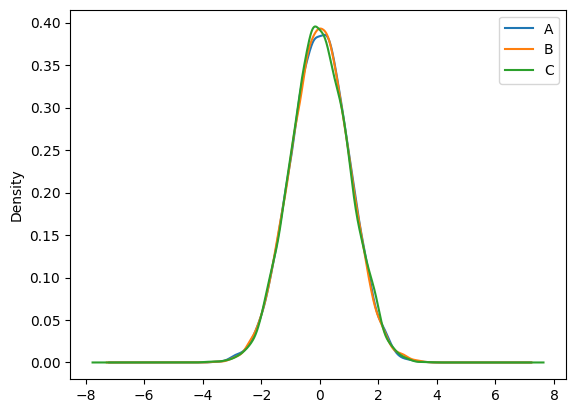

In [7]:
df.plot.kde()

In [8]:
minmax = MinMaxScaler()
mm_scaled = minmax.fit_transform(df)

<AxesSubplot:ylabel='Density'>

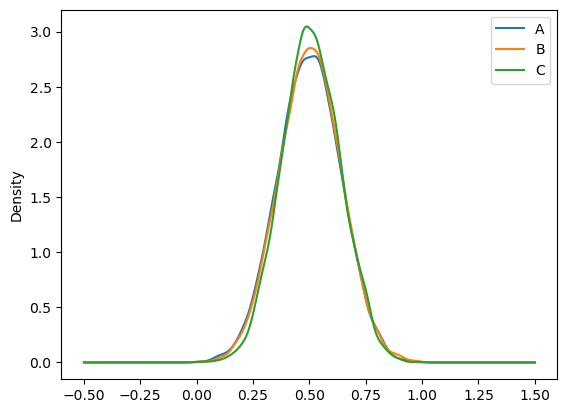

In [9]:
df = pd.DataFrame(mm_scaled,columns=['A','B','C'])
df.plot.kde()

In [10]:
rscaler = RobustScaler()

In [11]:
robust = rscaler.fit_transform(df)
df = pd.DataFrame(robust, columns=['A','B','C'])

<AxesSubplot:ylabel='Density'>

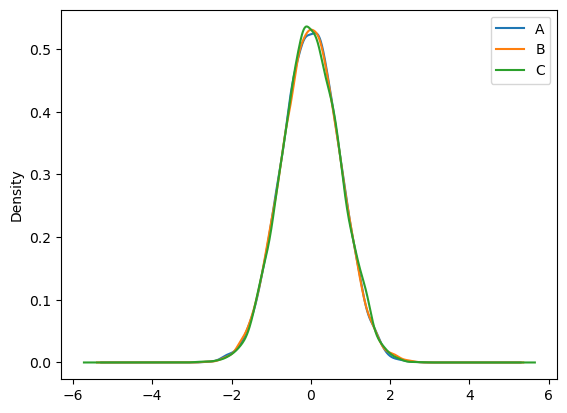

In [12]:
df.plot.kde()

In [6]:
binary = Binarizer(threshold=5)

a = np.array([[ 30, 10,  22],
              [ 20,  2,  10],
              [ 33,  5, 5]])

binary1 = binary.transform(a)
binary1

array([[1, 1, 1],
       [1, 0, 1],
       [1, 0, 0]])

In [3]:
X = [[5, 2, 3],
     [2, 4, 10],
     [6, 8, 6]]

sss = [np.sqrt(np.sum(np.power(X[i], 2))) for i in range(len(X))]

In [4]:
len(X)

3

In [20]:
np.array([X[k] / sss[k] for k in range(len(X))])

array([[0.81110711, 0.32444284, 0.48666426],
       [0.18257419, 0.36514837, 0.91287093],
       [0.51449576, 0.68599434, 0.51449576]])

In [21]:
normalizer = Normalizer()
data_tf = normalizer.fit_transform(X)

In [22]:
data_tf

array([[0.81110711, 0.32444284, 0.48666426],
       [0.18257419, 0.36514837, 0.91287093],
       [0.51449576, 0.68599434, 0.51449576]])

In [ ]:
dff = pd.read_csv("E:\Data Science\session6\session 6\DATASETS\DATASETS\encoding.csv")
dff

,TEAM,YEAR
0,A,2000
1,B,2002
2,C,2003
3,D,2004
4,A,2005
5,C,2006
6,B,2007
7,A,2008
8,D,2009


In [25]:
le = LabelEncoder()
df1 = dff
df1.TEAM = le.fit_transform(df1.TEAM)
df1

,TEAM,YEAR
0,0,2000
1,1,2002
2,2,2003
3,3,2004
4,0,2005
5,2,2006
6,1,2007
7,0,2008
8,3,2009


In [26]:
enc = OneHotEncoder()
enc_df1 = pd.DataFrame(enc.fit_transform(df1[['TEAM']]).toarray())
enc_df1

,0,1,2,3
0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0
5,0.0,0.0,1.0,0.0
6,0.0,1.0,0.0,0.0
7,1.0,0.0,0.0,0.0
8,0.0,0.0,0.0,1.0


In [27]:
abc = df1.join(enc_df1)
abc

,TEAM,YEAR,0,1,2,3
0,0,2000,1.0,0.0,0.0,0.0
1,1,2002,0.0,1.0,0.0,0.0
2,2,2003,0.0,0.0,1.0,0.0
3,3,2004,0.0,0.0,0.0,1.0
4,0,2005,1.0,0.0,0.0,0.0
5,2,2006,0.0,0.0,1.0,0.0
6,1,2007,0.0,1.0,0.0,0.0
7,0,2008,1.0,0.0,0.0,0.0
8,3,2009,0.0,0.0,0.0,1.0


In [28]:
final = abc.drop(['TEAM'], axis='columns')
final

,YEAR,0,1,2,3
0,2000,1.0,0.0,0.0,0.0
1,2002,0.0,1.0,0.0,0.0
2,2003,0.0,0.0,1.0,0.0
3,2004,0.0,0.0,0.0,1.0
4,2005,1.0,0.0,0.0,0.0
5,2006,0.0,0.0,1.0,0.0
6,2007,0.0,1.0,0.0,0.0
7,2008,1.0,0.0,0.0,0.0
8,2009,0.0,0.0,0.0,1.0
